<a href="https://colab.research.google.com/github/luisriverodiaz/CoderHouse_DataScienceI_PrimeraEntrega/blob/main/ProyectoDS_ParteI_Luis_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Entrega Trabajo Final
## Alumno Luis Rivero
## Comisión 60935
## Data Science I: Fundamentos para la Ciencia de Datos

# Abstract
El estudio inicia para una empresa en el rubro de aerolínea, donde lo que busca es realizar una análisis para entender cómo mejorar la preferencia de sus clientes hacia su empresa. Para esto se realiza una encuesta a más de 100.000 usuarios, recopilando información acerca de la satisfacción que persibieron en su experiencia de volar.

Hace ya varios años que el sector se ha vuelto más competitivo, han surgido varios compañias "Low Cost", donde buscan cada detalle para poder reducir costos, pero hay que cuidar que esa baja de costos no redunde en una experiencia de usuario negativa. Es por esto que poder conocer cómo piensa el usuario es clave para poder desarrollar un producto, que cuide el costo, pero que maximice positivamente la experiencia de viajar con nuestra compañía.

El dataset lo obtuve de [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv)

#Objetivo
El objetivo de este trabajo es entender cómo piensa el usuario medio de la aerolínea, la relación que puede existir entre nuestras acciones y la experiencia del usuario.

Para esto es clave entender y poder responder a ciertas preguntas:
*   ¿Cuáles son nuestros pasajeros (edad, sexo, origen,etc)?
*   ¿Por qué viajan (negocios, familia, placer, etc)?
*   ¿Qué prefieren al momento de reservar (antelación, ubicación del asiento, precio, poder llevar más equipaje)?
*   ¿Qué tan satisfechos están después de haber viajado con nosotros?

# Hipótesis
Identificamos como hipótesis, que la satisfacción del cliente no está solamente relacionada al precio que paga por el boleto de avión, tenemos la percepción que los clientes regulares y sobre todo los que viajan por negocios, están menos propensos a identificar problemas que le generen insatisfacción.

##Imports y carga de datos

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Cargo el dataset
# df = pd.read_csv('https://raw.githubusercontent.com/luisriverodiaz/CoderHouse_DataScienceI_PrimeraEntrega/main/train.csv')
# Se debería poder acceder de cualquiera de las dos formas
df = pd.read_csv('https://github.com/luisriverodiaz/CoderHouse_DataScienceI_PrimeraEntrega/raw/main/train.csv')

# Significado de los campos del dataset

En todos los casos que se responde nivel de satisfacción, 0 significa que no aplica (por ejemplo, no tenía wifi a bordo o no respondió), y la valoración es de 1 a 5

| Campo Original  | Campo Español  |   Significado  |
|---| |---|
| (sin nombre)   | |   Identificador de línea Auto incremental |
| id   | |   Identificador del encuestado |
| Gender   | Genero |   Género del pasajero (Masculino o Feminino) |
| Customer type   | Tipo Cliente |   Tipo de cliente (frecuente o no)  |
| Age   | Edad |   Edad del pasajero  |
| Type of travel  | Tipo Viaje |   Motivo del viaje (personal o de negocios)  |
| Class   | Clase |   Tipo de clase eligido (Bussines, Eco o Eco plus) |
| Flight distance   | Distancia Vuelo  |   La distancia del vuelo  |
| Inflight wifi service   | Wifi a Bordo |   Nivel de satisfacción del servicio de wifi abordo   |
| Departure/Arrival time convenient  | Horario Conveniente |   Nivel de satisfacción la conveniencia del horario de salida/llegada  |
| Ease of Online booking   | Facilidad Compra Online |    Nivel de satisfacción de la facilidad en la compra online |
| Gate location   | Ubicacion Puerta Embarque |    Nivel de satisfacción de la ubicación de puerta de embarque  |
| Food and drink   | Comida y Bebida |    Nivel de satisfacción de la comida y la bebida  |
| Online boarding  | Checkin Online |    Nivel de satisfacción del checkin online  |
| Seat comfort   | Comodiad Asiento |    Nivel de satisfacción de la comodidad del asiento |
| Inflight entertainment   | Entretenimiento a Bordo |    Nivel de satisfacción del entretenimiento abordo  |
| On-board service   | Servicio a Bordo |    Nivel de satisfacción del servicio a bordo  |
| Leg room service  | Espacio Piernas |   Nivel de satisfacción del espacio para las piernas en el asiento  |
| Baggage handling  | Manejo Equipaje |   Nivel de satisfacción del manejo del equipaje  |
| Checkin service  | Servicio Checkin |   Nivel de satisfacción del servicio de checkin  |
| inflight_service  | Servicio Vuelo |   Nivel de satisfacción del servicio en vuelo  |
| Cleanliness  | Limpieza |   Nivel de satisfacción de la limpieza  |
| Departure delay in minutes  | Retraso Salida |   Minutos de retraso de salida  |
| Arrival delay in minutes  | Retraso Llegada |   Minutos de retraso de llegada  |
| satisfaction  | Satisfaccion |   Nivel de satisfacción con la aerolínea (satisfecho o neutral/insatisfecho)  |

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.shape

(103904, 25)

# Procesamiento de los datos

In [5]:
# Las dos primeras columnas carecen de significado para el análisis de este
# trabajo. Procedo a eliminarlas
df = df.drop(columns=['Unnamed: 0', 'id'])
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [6]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
# Reviso cantidad de datos de cada columna y el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [8]:
# Para simplificar el análisis a cualquier persona que lea el trabajo, renombro
# las columnas al español
df.columns=['Genero','Tipo Cliente','Edad','Tipo Viaje','Clase','Distancia Vuelo','Wifi a Bordo','Horario Conveniente','Facilidad Compra Online','Ubicacion Puerta Embarque','Comida y Bebida','Checkin Online','Comodidad Asiento','Entretenimiento a Bordo','Servicio a Bordo','Espacio Piernas','Manejo Equipaje','Servicio Checkin','Servicio Vuelo','Limpieza','Retraso Salida','Retraso Llegada','Satisfaccion']

In [9]:
# Reviso cómo quedaron los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Genero                     103904 non-null  object 
 1   Tipo Cliente               103904 non-null  object 
 2   Edad                       103904 non-null  int64  
 3   Tipo Viaje                 103904 non-null  object 
 4   Clase                      103904 non-null  object 
 5   Distancia Vuelo            103904 non-null  int64  
 6   Wifi a Bordo               103904 non-null  int64  
 7   Horario Conveniente        103904 non-null  int64  
 8   Facilidad Compra Online    103904 non-null  int64  
 9   Ubicacion Puerta Embarque  103904 non-null  int64  
 10  Comida y Bebida            103904 non-null  int64  
 11  Checkin Online             103904 non-null  int64  
 12  Comodidad Asiento          103904 non-null  int64  
 13  Entretenimiento a Bordo    10

In [10]:
# Reviso las columnas que tienen valores de tipo object ya que son categóricas,
# para traducirlas al español

df.Genero.value_counts()

Genero
Female    52727
Male      51177
Name: count, dtype: int64

In [11]:
diccionario_genero={'Female':'Femenino','Male':'Masculino'}
df.Genero = df.Genero.replace(diccionario_genero)
df.Genero.value_counts()

Genero
Femenino     52727
Masculino    51177
Name: count, dtype: int64

In [12]:
df['Tipo Cliente'].value_counts()

Tipo Cliente
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [13]:
diccionario_tipo_cliente = {'Loyal Customer':'Frecuente','disloyal Customer':'No Frecuente'}
df['Tipo Cliente'] = df['Tipo Cliente'].replace(diccionario_tipo_cliente)
df['Tipo Cliente'].value_counts()

Tipo Cliente
Frecuente       84923
No Frecuente    18981
Name: count, dtype: int64

In [14]:
df['Tipo Viaje'].value_counts()

Tipo Viaje
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64

In [15]:
diccionario_tipo_viaje = {'Business travel':'Negocios','Personal Travel':'Personal'}
df['Tipo Viaje'] = df['Tipo Viaje'].replace(diccionario_tipo_viaje)
df['Tipo Viaje'].value_counts()

Tipo Viaje
Negocios    71655
Personal    32249
Name: count, dtype: int64

In [16]:
df.Clase.value_counts()
# Queda bastante claro con esta nomenclatura

Clase
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64

In [17]:
df.Satisfaccion.value_counts()

Satisfaccion
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [18]:
diccionario_satisfaccion={'satisfied':'Satisfecho','neutral or dissatisfied':'Neutral/Insatisfecho'}
df.Satisfaccion = df.Satisfaccion.replace(diccionario_satisfaccion)
df.Satisfaccion.value_counts()

Satisfaccion
Neutral/Insatisfecho    58879
Satisfecho              45025
Name: count, dtype: int64

In [19]:
# Voy a corregir los tipos de datos, cambiando a a categórico todos los campos que lo ameritan
indices_categoricos = [0,1,3,4] + list(range(6,20)) + [22]
df[df.columns[indices_categoricos]] = df[df.columns[indices_categoricos]].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Genero                     103904 non-null  category
 1   Tipo Cliente               103904 non-null  category
 2   Edad                       103904 non-null  int64   
 3   Tipo Viaje                 103904 non-null  category
 4   Clase                      103904 non-null  category
 5   Distancia Vuelo            103904 non-null  int64   
 6   Wifi a Bordo               103904 non-null  category
 7   Horario Conveniente        103904 non-null  category
 8   Facilidad Compra Online    103904 non-null  category
 9   Ubicacion Puerta Embarque  103904 non-null  category
 10  Comida y Bebida            103904 non-null  category
 11  Checkin Online             103904 non-null  category
 12  Comodidad Asiento          103904 non-null  category
 13  Entretenimient

In [20]:
# Reviso la cantidad de nulos
df.isnull().sum()

Genero                         0
Tipo Cliente                   0
Edad                           0
Tipo Viaje                     0
Clase                          0
Distancia Vuelo                0
Wifi a Bordo                   0
Horario Conveniente            0
Facilidad Compra Online        0
Ubicacion Puerta Embarque      0
Comida y Bebida                0
Checkin Online                 0
Comodidad Asiento              0
Entretenimiento a Bordo        0
Servicio a Bordo               0
Espacio Piernas                0
Manejo Equipaje                0
Servicio Checkin               0
Servicio Vuelo                 0
Limpieza                       0
Retraso Salida                 0
Retraso Llegada              310
Satisfaccion                   0
dtype: int64

In [21]:
# Calculo el porcentajde nulos sobre el total para ver la relevancia
porcentaje = ((df.isnull().sum() / len(df))*100).round(2).sort_values(ascending = False)
print(porcentaje)

Retraso Llegada              0.3
Genero                       0.0
Comodidad Asiento            0.0
Retraso Salida               0.0
Limpieza                     0.0
Servicio Vuelo               0.0
Servicio Checkin             0.0
Manejo Equipaje              0.0
Espacio Piernas              0.0
Servicio a Bordo             0.0
Entretenimiento a Bordo      0.0
Checkin Online               0.0
Tipo Cliente                 0.0
Comida y Bebida              0.0
Ubicacion Puerta Embarque    0.0
Facilidad Compra Online      0.0
Horario Conveniente          0.0
Wifi a Bordo                 0.0
Distancia Vuelo              0.0
Clase                        0.0
Tipo Viaje                   0.0
Edad                         0.0
Satisfaccion                 0.0
dtype: float64


In [22]:
# Completo los nulos con la mediana y verifico
df['Retraso Llegada'].fillna(df['Retraso Llegada'].median(axis = 0), inplace = True)
df.isnull().sum()

Genero                       0
Tipo Cliente                 0
Edad                         0
Tipo Viaje                   0
Clase                        0
Distancia Vuelo              0
Wifi a Bordo                 0
Horario Conveniente          0
Facilidad Compra Online      0
Ubicacion Puerta Embarque    0
Comida y Bebida              0
Checkin Online               0
Comodidad Asiento            0
Entretenimiento a Bordo      0
Servicio a Bordo             0
Espacio Piernas              0
Manejo Equipaje              0
Servicio Checkin             0
Servicio Vuelo               0
Limpieza                     0
Retraso Salida               0
Retraso Llegada              0
Satisfaccion                 0
dtype: int64

In [23]:
# Ahora le puedo cambiar el tipo de dato a la columna Retraso Lllegada ya que no
# tiene más nulos
df[df.columns[21]] = df[df.columns[21]].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Genero                     103904 non-null  category
 1   Tipo Cliente               103904 non-null  category
 2   Edad                       103904 non-null  int64   
 3   Tipo Viaje                 103904 non-null  category
 4   Clase                      103904 non-null  category
 5   Distancia Vuelo            103904 non-null  int64   
 6   Wifi a Bordo               103904 non-null  category
 7   Horario Conveniente        103904 non-null  category
 8   Facilidad Compra Online    103904 non-null  category
 9   Ubicacion Puerta Embarque  103904 non-null  category
 10  Comida y Bebida            103904 non-null  category
 11  Checkin Online             103904 non-null  category
 12  Comodidad Asiento          103904 non-null  category
 13  Entretenimient

In [24]:
df.describe().round(1)

,Edad,Distancia Vuelo,Retraso Salida,Retraso Llegada
count,103904.0,103904.0,103904.0,103904.0
mean,39.4,1189.4,14.8,15.1
std,15.1,997.1,38.2,38.6
min,7.0,31.0,0.0,0.0
25%,27.0,414.0,0.0,0.0
50%,40.0,843.0,0.0,0.0
75%,51.0,1743.0,12.0,13.0
max,85.0,4983.0,1592.0,1584.0


# Análisis de los Insights
## Distribución por género

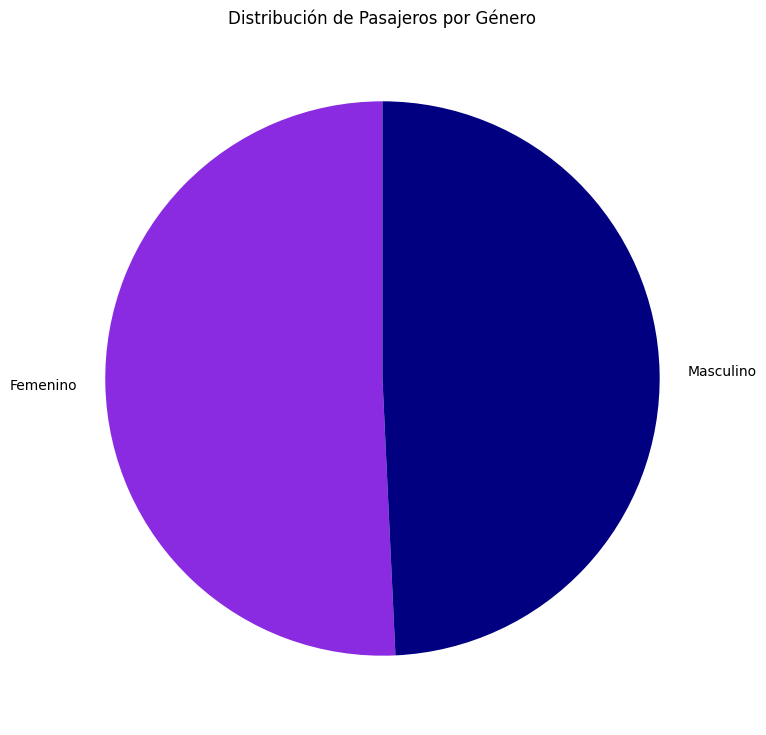

In [25]:
# Establezco el criterio por género
distribucion_por_genero = (df.Genero.value_counts()
                                    .to_frame('Cantidad').reset_index().rename(columns={'index':'Genero'}))
# Establezco el criterio por clase de asiento
distribucion_genero_asiento = (df.groupby(['Clase','Genero']).Genero.count()
                               .to_frame('Cantidad').reset_index().rename(columns={'index':'Genero'}))

# Grafico por Género
colores_genero = {'Masculino':'navy', 'Femenino':'blueviolet'}
figura_genero_general, ax = plt.subplots(figsize = (9,9))
ax.pie(distribucion_por_genero['Cantidad'], labels=distribucion_por_genero['Genero'], startangle=90, colors=[colores_genero[g] for g in distribucion_por_genero['Genero']])
ax.set_title('Distribución de Pasajeros por Género')
figura_genero_general.show()

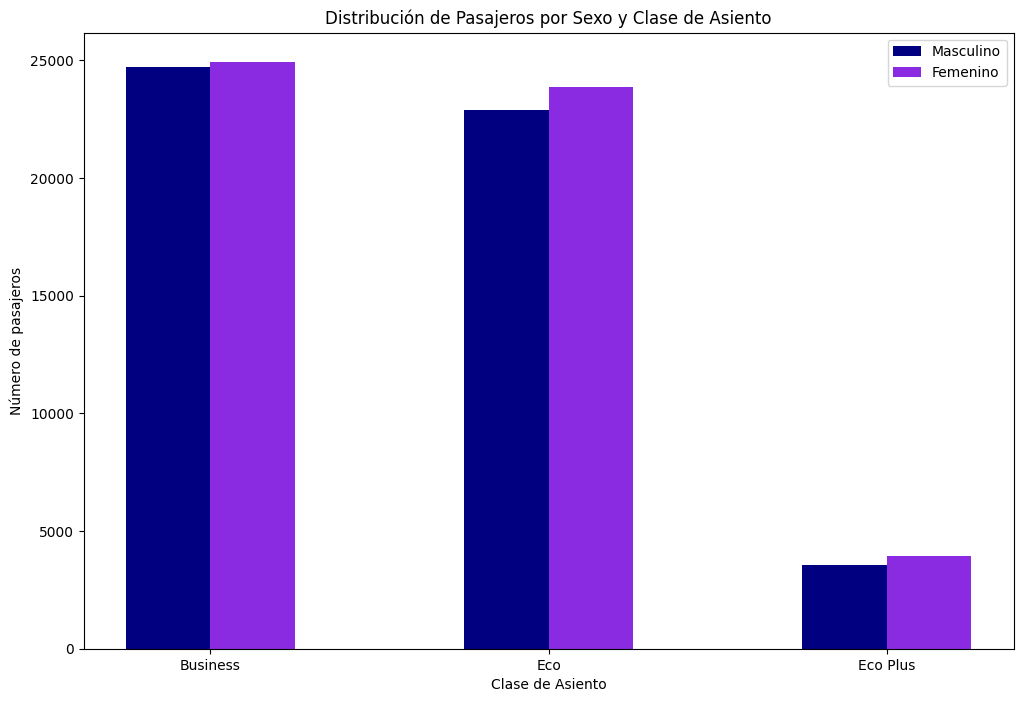

In [26]:
fig_distribucion_genero_asientos = plt.subplots(figsize = (12, 8))

grupo  = distribucion_genero_asiento.groupby(['Clase', 'Genero']).sum().unstack()

indice_lista = list(range(len(grupo)))

bar_masculino = plt.bar(indice_lista, grupo['Cantidad']['Masculino'], width = 0.25, label = 'Masculino', color = colores_genero['Masculino'])
bar_femenino = plt.bar([x + 0.25 for x in indice_lista], grupo['Cantidad']['Femenino'], width = 0.25, label = 'Femenino', color = colores_genero['Femenino'])

plt.style.use('default')
plt.title('Distribución de Pasajeros por Sexo y Clase de Asiento')
plt.xlabel('Clase de Asiento')
plt.ylabel('Número de pasajeros')
plt.legend()
plt.xticks([x + 0.25 / 2 for x in indice_lista], grupo.index)

plt.show()

# Tipo de Cliente según el Género

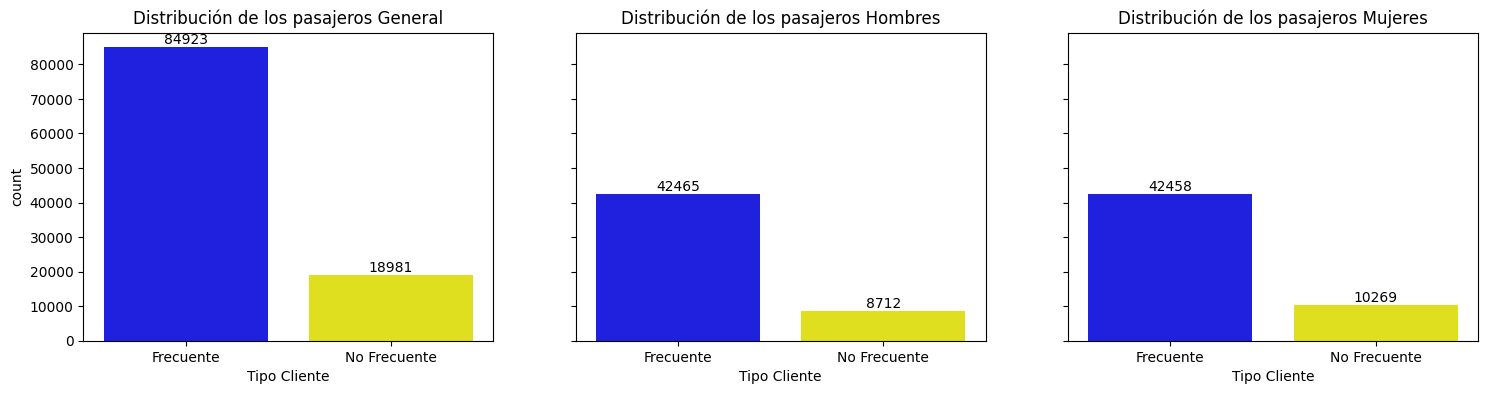

In [32]:
# Que ignore las advertencias
import warnings
warnings.filterwarnings("ignore")

fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colores_tipo_cliente = ["blue", "yellow"]
# Defino el orden de los tipos de viaje
order = ['Frecuente', 'No Frecuente']

for i, (gen_pas, genero) in enumerate(zip([['Masculino','Femenino'], ['Masculino'], ['Femenino']], ['General', 'Hombres', 'Mujeres'])):
    df_gen_pas = df[df['Genero'].isin(gen_pas)]

    sns.countplot(data = df_gen_pas, x = 'Tipo Cliente', ax = axs[i], order = order, palette = colores_tipo_cliente)
    axs[i].set_title('Distribución de los pasajeros ' + genero)

    for bar in axs[i].patches:
        valor = str(int(bar.get_height()))
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.show()

# Tipo de Viaje según Género

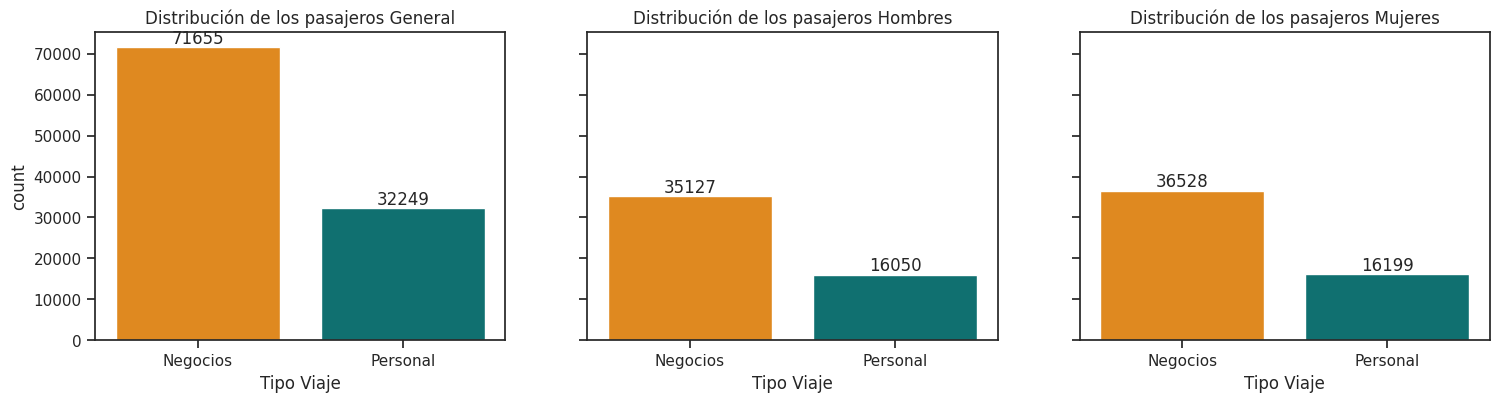

In [73]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), sharey=True)
colors = ["darkorange", "teal"]
# Defino el orden de los tipos de viaje
order = ['Negocios', 'Personal']

for i, (gen_pas, genero) in enumerate(zip([['Masculino','Femenino'], ['Masculino'], ['Femenino']], ['General', 'Hombres', 'Mujeres'])):
    df_gen_pas = df[df['Genero'].isin(gen_pas)]

    sns.countplot(data = df_gen_pas, x = 'Tipo Viaje', ax = axs[i], order = order, palette = colors)
    axs[i].set_title('Distribución de los pasajeros ' + genero)

    for bar in axs[i].patches:
        valor = str(int(bar.get_height()))
        axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor}', ha = 'center', va = 'bottom')

plt.show()

# Tipo de Cliente según Edad

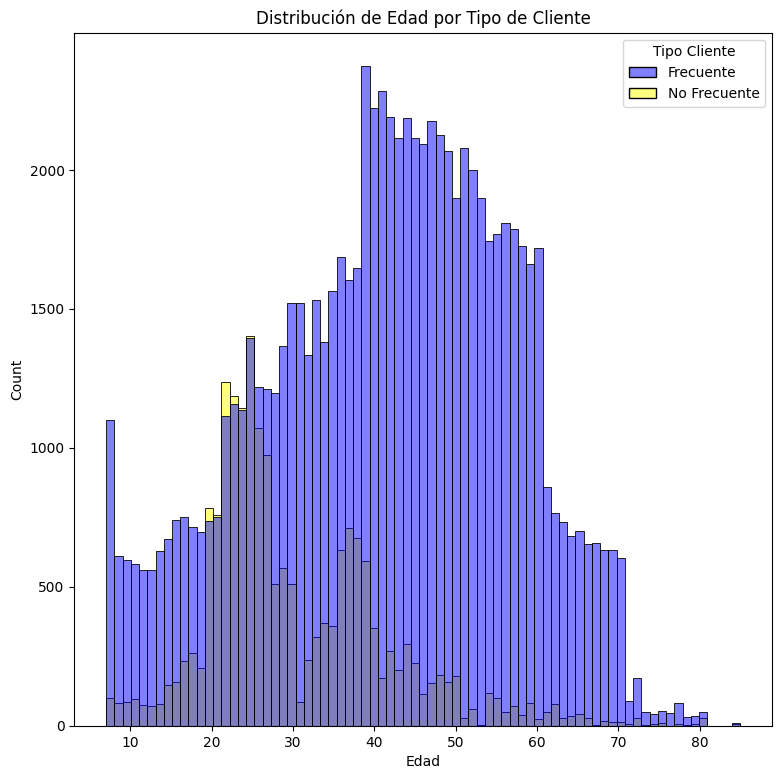

In [33]:
figura, ax = plt.subplots(figsize = (9,9))
sns.histplot(df, x='Edad', hue='Tipo Cliente', palette = colores_tipo_cliente)
ax.set_title('Distribución de Edad por Tipo de Cliente')

plt.show()

# Distribución de asientos por Clase y Tipo de viaje

In [40]:
distribucion_asientos= (df.groupby(['Clase','Tipo Viaje'])['Tipo Viaje'].count()
                               .to_frame('Cantidad').reset_index().rename(columns={'index':'Tipo Viaje'}))
distribucion_asientos

,Clase,Tipo Viaje,Cantidad
0,Business,Negocios,47508
1,Business,Personal,2157
2,Eco,Negocios,20257
3,Eco,Personal,26488
4,Eco Plus,Negocios,3890
5,Eco Plus,Personal,3604


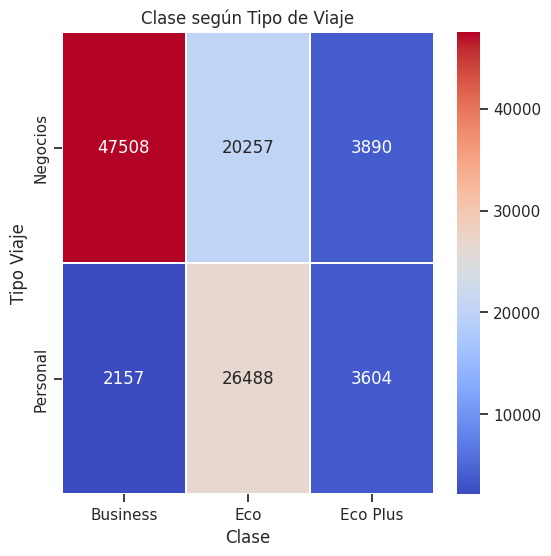

In [60]:
asientos = distribucion_asientos.pivot(index = 'Tipo Viaje', columns = 'Clase', values = 'Cantidad')
fig, ax = plt.subplots(figsize=(6,6))
sns.set_theme(style = 'ticks', font_scale = 1)
mapa_calor = sns.heatmap(asientos, annot=True, fmt = '.0f', linewidths = .2, ax = ax, cmap = 'coolwarm')
mapa_calor.set (xlabel = 'Clase', ylabel = 'Tipo Viaje', title = 'Clase según Tipo de Viaje')

plt.show()

# Correlación en el Retraso


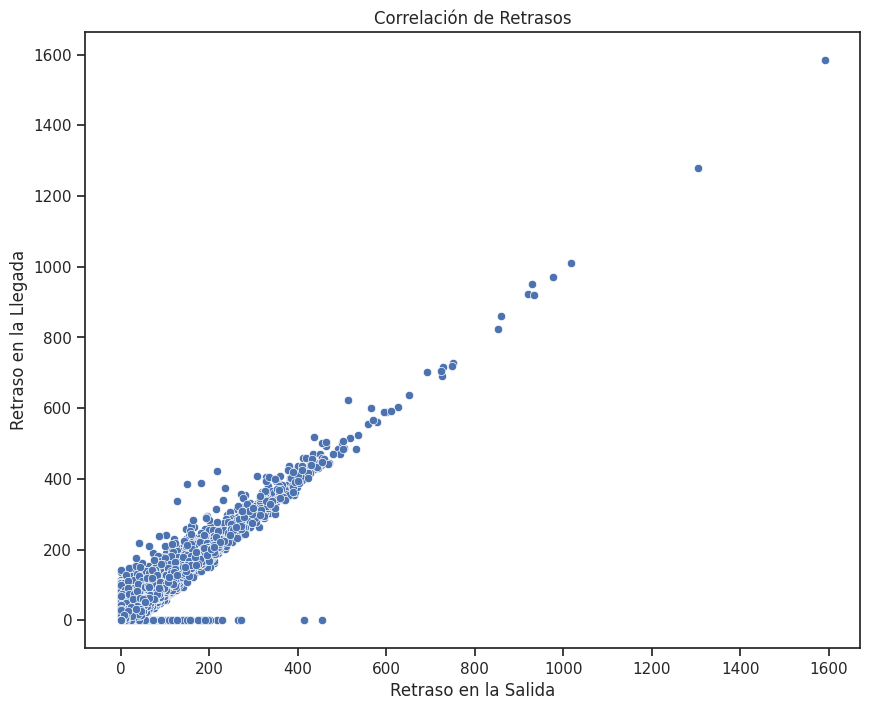

In [62]:
plt.subplots(figsize = (10,8))

sctretraso = sns.scatterplot(x = 'Retraso Salida', y = 'Retraso Llegada', data = df)
sctretraso.set(xlabel = 'Retraso en la Salida', ylabel = 'Retraso en la Llegada', title = 'Correlación de Retrasos')

plt.show()

## Significado del gráfico
De este gráfico se desprende que existe una fuerte correlación entre el retraso en la salida y la llegada. Se podría omitir una de las variables y no cambiaría significativamente el resultado obtenido.

# Relación entre Satisfacción y las valoraciones de los encuestados

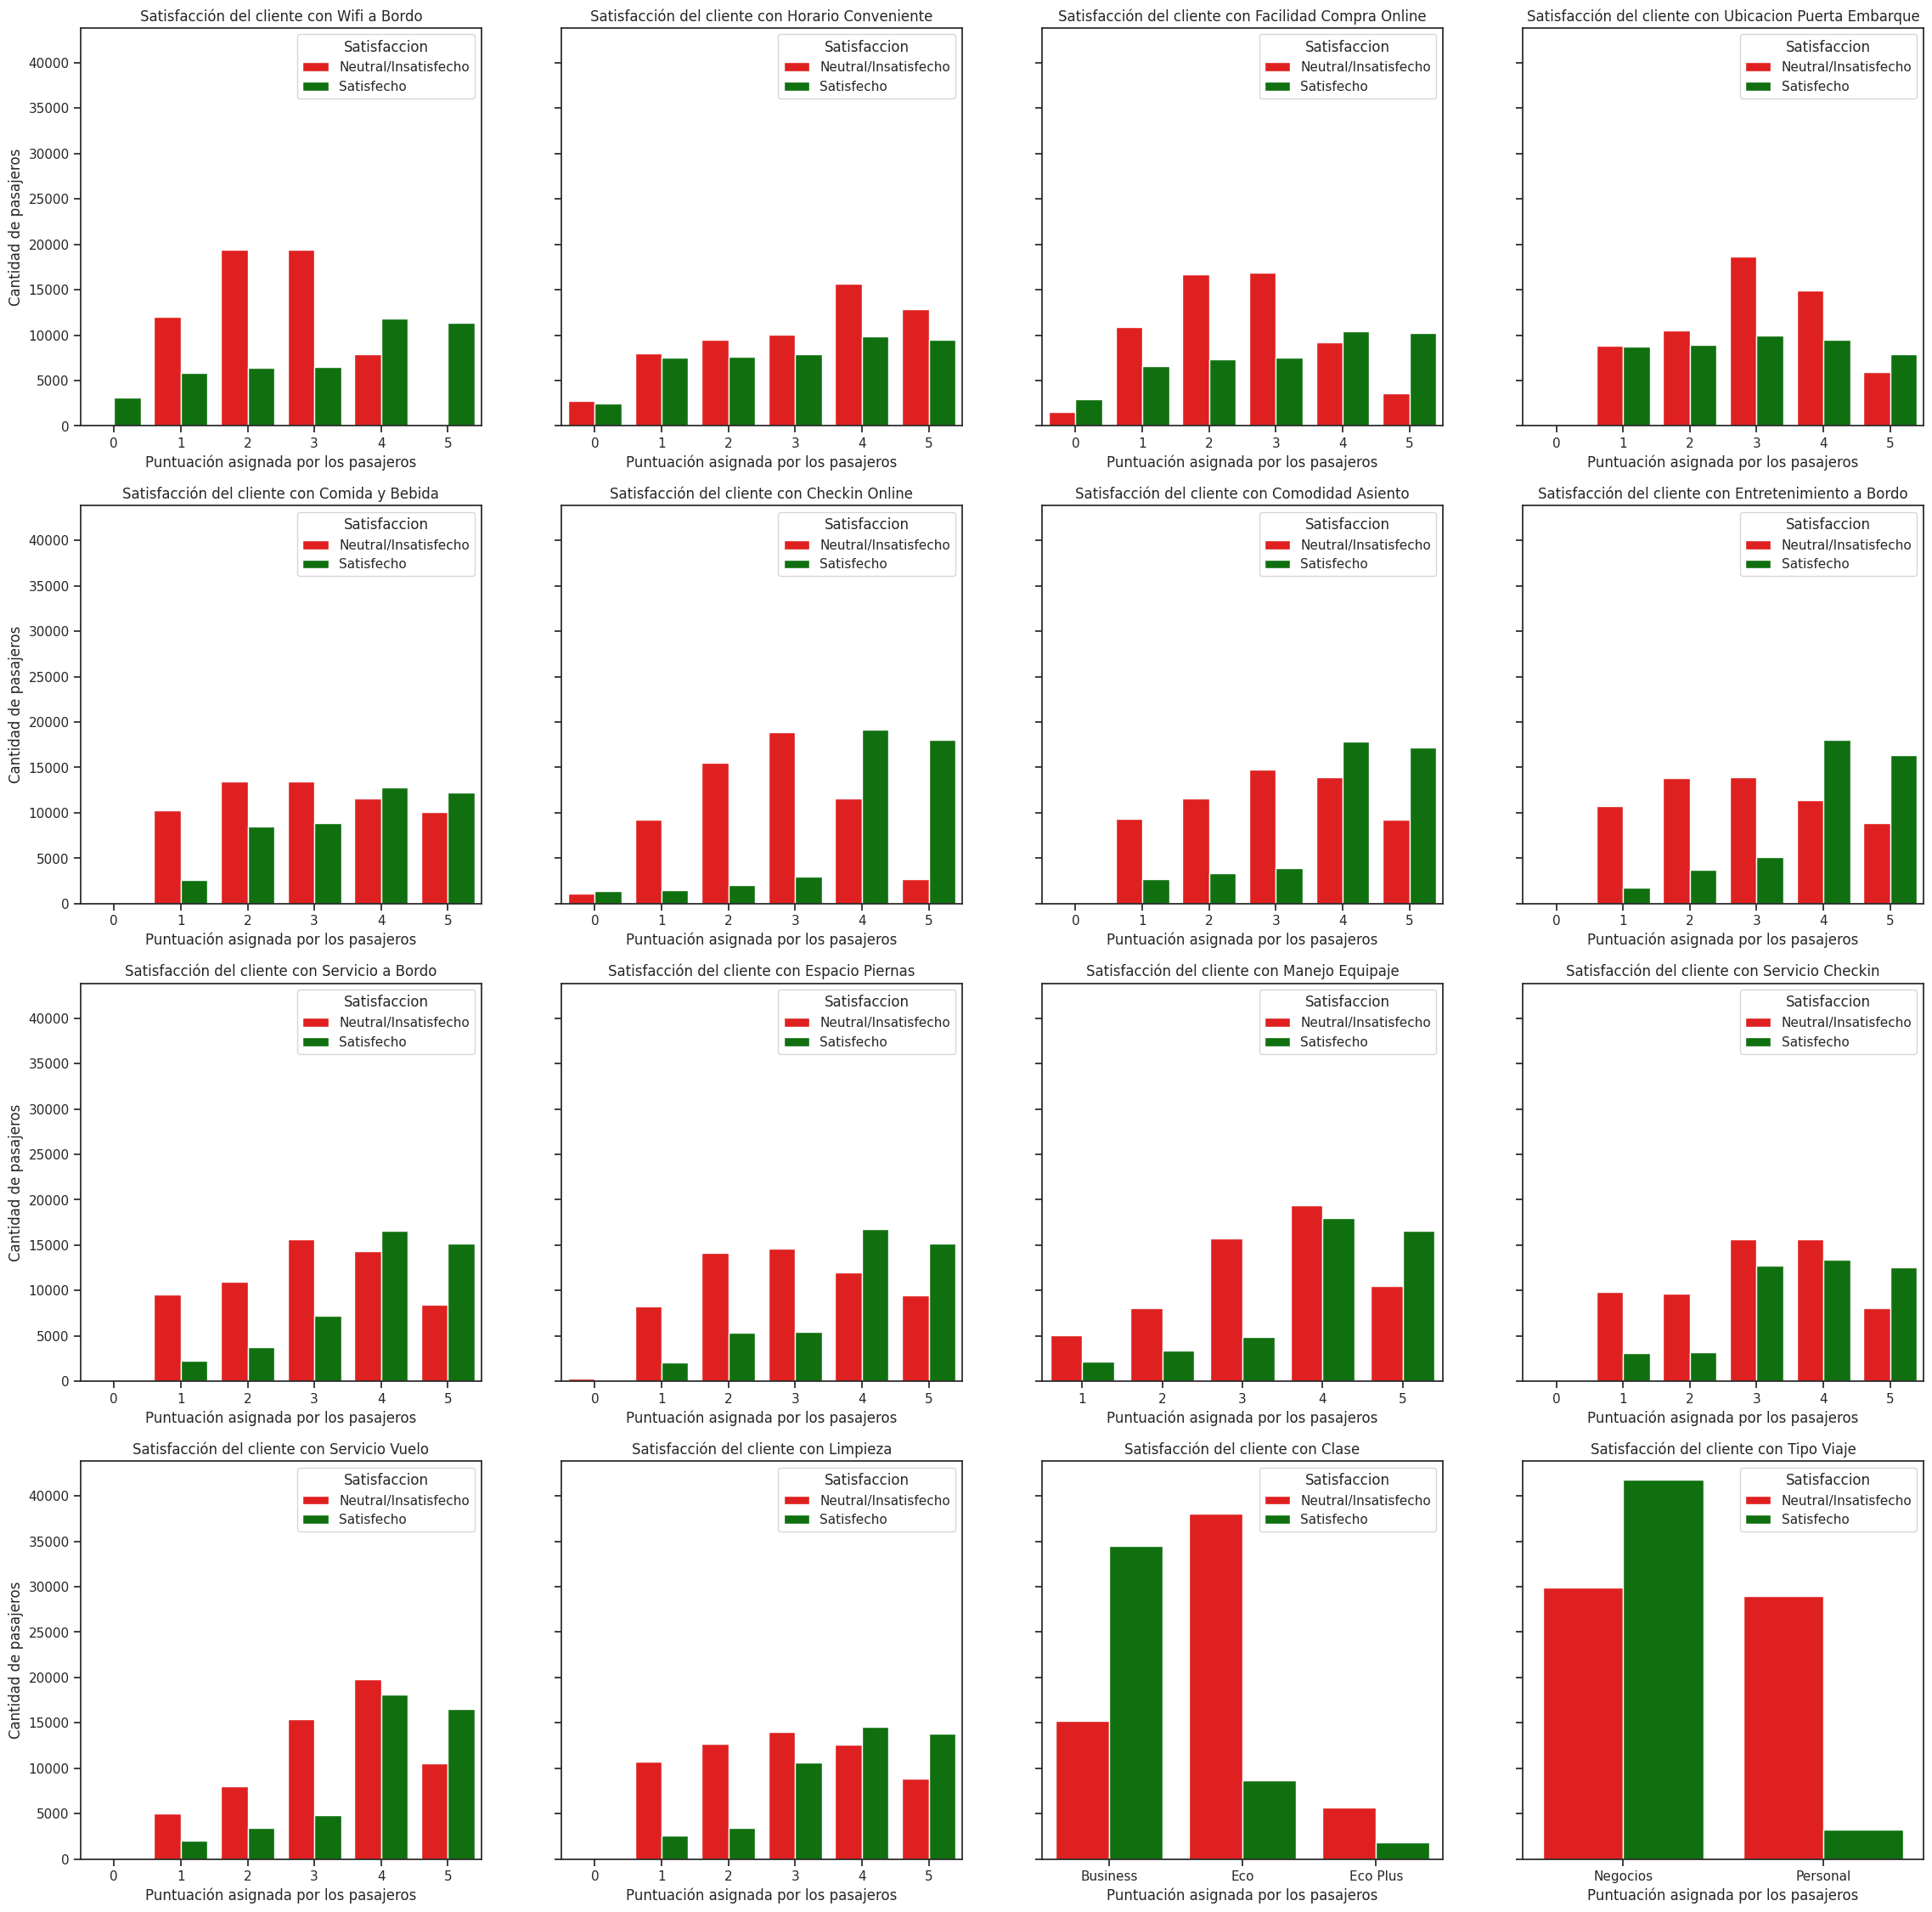

In [72]:
fig, axs = plt.subplots(4, 4, figsize = (28, 28), sharey = True)
colors = {'Satisfecho':'green', 'Neutral/Insatisfecho':'red'}

for variable, ax in zip(['Wifi a Bordo','Horario Conveniente','Facilidad Compra Online','Ubicacion Puerta Embarque','Comida y Bebida','Checkin Online','Comodidad Asiento','Entretenimiento a Bordo','Servicio a Bordo','Espacio Piernas','Manejo Equipaje','Servicio Checkin','Servicio Vuelo','Limpieza','Clase','Tipo Viaje'], axs.flat):
    # Grafico
    sns.countplot(x = df[variable], hue = df['Satisfaccion'], ax = ax, palette = colors)
    ax.set_title(f'Satisfacción del cliente con {variable}')
    ax.set(xlabel = 'Valoración de los pasajeros', ylabel = 'Cantidad de pasajeros')

#Conclusiones
- Los pasajeros en oportunidad de un viaje personal, son más susceptibles a sentirse insatisfechos que aquellos que lo hacen por negocios.
- Es muy marcado el nivel de instatisfacción para los pasajeros de clase "Eco", por lo que resulta importante, revisar lo que se le ofrece, para mejorar.
- Se encuentra una relación bastante directa en varios de los tópicos consultados:
	* Wifi a Bordo
	* Facilidad en la Compra Online
	* Check-in Online
	* Comodidad del asiento
	* Entretenimiento a Bordo
	* Servicio a Bordo
	* Espacio para las piernas